<a href="https://colab.research.google.com/github/anastasiiaCher/python-for-DPaV/blob/main/labs/%D0%9B%D0%A04_%D0%A0%D0%B5%D0%BA%D0%BE%D0%BC%D0%B5%D0%BD%D0%B4%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи


**Цель работы:** применение идей коллаборативной фильтрации и фильтрации, основанной на контенте, для формирования рекомендаций фильмов пользователям.

**Краткое описание:** в лабораторной работе необходимо выполнить 3 задания на исследование данных о фильмах с сайта [MovieLens](http://movielens.org) и применение двух подходов к построению рекомендаций фильмов – на основе предпочтений похожих пользователей и на основе предпочтений пользователя, для которого генерируется рекомендация.

#  Данные


Набор данных `ml-25m` включает в себя описание 5-звёздного рейтинга фильмов с сайта [MovieLens](http://movielens.org) – одного из старейших сервисов по рекомендации фильмов. Набор данных содержит 25 000 095 оценок и 1 093 360 применений тегов к 62 423 фильмам. Эти данные были созданы 162 541 пользователями в период с 9 января 1995 года по 21 ноября 2019 года – именно в этот день был сгенерирован датасет.

Пользователи были выбраны случайным образом при условии, что пользователь оценил как минимум 20 фильмов. Демографическая информация в набор данных не включена. Каждый пользователь представлен только `id`.

В папке [Data/lab4](https://drive.google.com/drive/folders/1tHu5zzSTF_ZB9OfeaWvM4cWwGM2q99b8?usp=sharing) расположено несколько таблиц с характеристиками фильмов. Также эти данные доступны для скачивания [по ссылке](https://grouplens.org/datasets/movielens/25m/) (как и другие наборы данных от GroupLens). Все задания лабораторной работы необходимо выполнять по этим данным.

Данные включают в себя файлы: `genome-scores.csv`, `genome-tags.csv`, `links.csv`, `movies.csv`, `ratings.csv` и `tags.csv`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
sns.set_context("notebook")

In [ ]:
# загрузка данных из папки Data/lab4
!gdown 1KjMiVB0j5B6yF5vnwLGYcThQaPkPx0tH
!gdown 1uWeLWEkkd_GX8HoMVxpRXdSg7BgfSCdR
!gdown 1xcv1ZY8bwi-AkqZGs5_f8kIPXWHa8Q1W
!gdown 1ahac-9nULw9C1aS7pxh05RTtSlbxJxlS
!gdown 1bYRHTZJ1eZ5T2IugHxsDwrc4xuaWB-A9
!gdown 1XaxxydOXE5zdhhehv-Wig99CuJmg0B_w

Downloading...
From (original): https://drive.google.com/uc?id=1KjMiVB0j5B6yF5vnwLGYcThQaPkPx0tH
From (redirected): https://drive.google.com/uc?id=1KjMiVB0j5B6yF5vnwLGYcThQaPkPx0tH&confirm=t&uuid=9aa94c4d-63ad-48c9-9915-cabec84ae63a
To: /content/genome-scores.csv
100% 435M/435M [00:03<00:00, 122MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1uWeLWEkkd_GX8HoMVxpRXdSg7BgfSCdR
To: /content/genome-tags.csv
100% 18.1k/18.1k [00:00<00:00, 35.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xcv1ZY8bwi-AkqZGs5_f8kIPXWHa8Q1W
To: /content/links.csv
100% 1.37M/1.37M [00:00<00:00, 50.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ahac-9nULw9C1aS7pxh05RTtSlbxJxlS
To: /content/movies.csv
100% 3.04M/3.04M [00:00<00:00, 124MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1bYRHTZJ1eZ5T2IugHxsDwrc4xuaWB-A9
From (redirected): https://drive.google.com/uc?id=1bYRHTZJ1eZ5T2IugHxsDwrc4xuaWB-A9&confirm=t&uuid=b892e54b-73db-4b4e-a30b-05698a8d7898
To: /con

### Таблица ```tags.csv```
##### **Описание**
Таблица содержит все теги фильмов. Теги - это сгенерированные пользователями метаданные о фильмах. Каждый тег обычно представляет собой слово или коротку фразу. Значение, ценность и цель каждого тега определяется каждым пользователем.


##### **Формат данных**


```
userId,movieId,tag,timestamp
3,260,classic,1439472355
3,260,sci-fi,1439472256
4,1732,dark,comedy,1573943598
...
```
##### **Описание полей**

 - ``` userId``` — идентификатор пользователя;
 - ``` movieId``` — идентификатор фильма;
 - ``` tag``` — название тега;
 - ``` timestamp``` — количество секунд, прошедших с 1 января 1970.


In [ ]:
# создание датафрейма тегов
tag=pd.read_csv('tags.csv')
tag.sample(3)

,userId,movieId,tag,timestamp
663715,82770,922,atmospheric,1378321455
907955,131116,101285,tivo,1478889101
988840,144394,2571,superpowers,1562192837


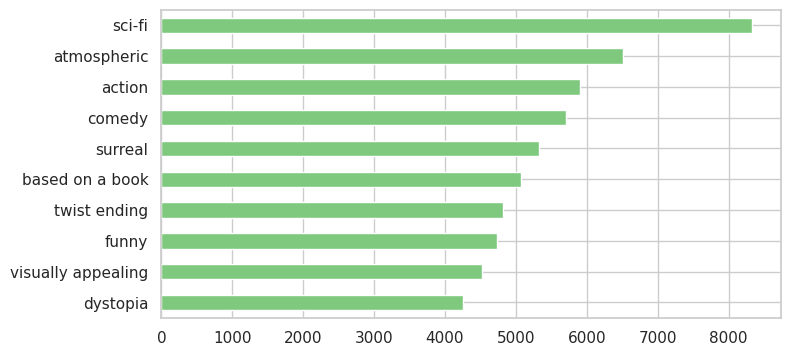

In [ ]:
tag_counts = tag['tag'].value_counts()
tag_counts[:10].sort_values().plot(kind='barh', figsize=(8,4), colormap="Accent");

### Таблица ```ratings.csv```
##### **Описание**
В таблице представлены оценки пользователей за фильмы. Рейтинги предствляют собой школу из 5 звезд с использованием половинки звезды (от 0.5 звёзд до 5.0 звёзд).

##### **Формат данных**

```
userId,movieId,rating,timestamp
1,296,5.0,1147880044
1,306,3.5,1147868817
1,307,5.0,1147868828
...
```
##### **Описание полей**

 - ``` userId``` — идентификатор пользователя;
 - ``` movieId``` — идентификатор фильма;
 - ``` rating``` — оценка, которую пользователь поставил фильму;
 - ``` timestamp``` — количество секунд, прошедших с 1 января 1970..

Строки упорядочены по `userId`, а затем по `movieId`.

In [ ]:
# загрузка данных о рейтингах
rating=pd.read_csv('ratings.csv')
rating.sample(3)

,userId,movieId,rating,timestamp
15611962,101086,2571,4.0,1141021787
23693647,153873,2533,3.5,1313400372
10453311,67828,3108,3.0,958597332


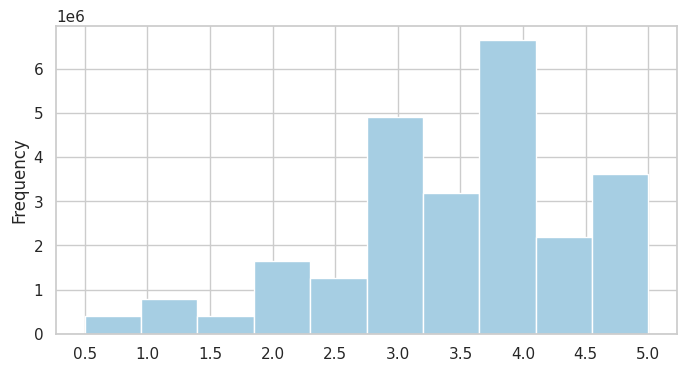

In [ ]:
# гистограмма рейтингов
rating["rating"].plot(kind='hist', figsize=(8,4), colormap="Paired", xticks=np.arange(0.5,5.5,0.5));

### Таблица ```movies.csv```
##### **Описание**
Таблица содержит информацию о фильмах. Каждая строка представляет информацию об одном фильме. Названия фильмов вводились вручную или были импортированы с сайта <https://www.themoviedb.org/>.


##### **Формат данных**

```
movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
...
```
##### **Описание полей**

 - ``` movieId``` — идентификатор фильма;
 - ``` title``` — название фильма и год выпуска в скобках после названия;
 - ``` genres``` — список жанров фильма, все жанры записываются в одном поле через разделитель `|`.


Допустимые жанры | $ $
--- | ---
1. Action | 11. Horror
2. Adventure | 12. Musical
3. Animation | 13. Mystery
4. Children's | 14. Romance
5. Comedy | 15. Sci-Fi
6. Crime | 16. Thriller
7. Documentary | 17. War
8. Drama | 18. Western
9. Fantasy | 19. (no genres listed)
10. Film-Noir |  











### Таблица ```genome-tags.csv```
##### **Описание**

[genome-paper]: http://files.grouplens.org/papers/tag_genome.pdf

Tag genome – это структура данных, которая описывает релевантность тегов по отношению к фильму. Заданы 1128 тэгов, и по каждому фильму указаны значения релевантности для каждого тега.

Описание [в статье][genome-paper]. Tag genome был рассчитан с помощью алгоритма на основе пользовательского контента, включая теги, рейтинги и текстовые описания.

Таблица содержит описания тегов.


##### **Формат данных**

```
tagId,tag
2,007 (series)
4,1920s
11,3d
22,adapted from:book
...
```
##### **Описание полей**

 - ``` tagId``` — идентификатор тега, значения сгенерированы в тот момент, когда экспортировался весь набор данных, так что могут быть не такими, как в других версиях датасетов от MovieLens (например, 1М и 20M).;
 - ``` tag``` — название тега.


### Таблица ```genome-scores.csv```
##### **Описание**
Таблица содержит релевантность тегов по отношению к фильмам.

##### **Формат данных**

```
movieId,tagId,relevance
1,3,0.0625
1,5,0.14075
1,8,0.20375
...
```
##### **Описание полей**

 - ``` movieId``` — идентификатор фильма;
 - ``` tagId``` — идентификатор тега;
 - ``` relevance``` — релевантность тега фильму.


In [ ]:
# загрузка данных о фильмах и tag genome
movies = pd.read_csv("movies.csv")
genome_scores = pd.read_csv('genome-scores.csv')
genome_tag = pd.read_csv('genome-tags.csv')

In [ ]:
# релевантность каждого тега фильму Demolition Man (1993)
genome_scores[genome_scores.movieId == 442]

,movieId,tagId,relevance
474888,442,1,0.04525
474889,442,2,0.04575
474890,442,3,0.03475
474891,442,4,0.04700
474892,442,5,0.06375
...,...,...,...
476011,442,1124,0.04400
476012,442,1125,0.03250
476013,442,1126,0.00800
476014,442,1127,0.11775


In [ ]:
# выведем 5 фильмов с самой высокой релевантностью тега "dragon"
genome_tag[genome_tag.tag == 'dragon']

,tagId,tag
320,321,dragon


In [ ]:
top5_dragon_genom = genome_scores.query("tagId == 321").nlargest(5, "relevance")
movies[movies.movieId.isin(top5_dragon_genom.movieId)]

,movieId,title,genres
642,653,Dragonheart (1996),Action|Adventure|Fantasy
4933,5039,Dragonslayer (1981),Action|Adventure|Fantasy
14477,76093,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX
20603,106489,"Hobbit: The Desolation of Smaug, The (2013)",Adventure|Fantasy|IMAX
21757,112175,How to Train Your Dragon 2 (2014),Action|Adventure|Animation


### Таблица ```links.csv```
##### **Описание**
Таблица содержит идентификаторы фильмов с других ресурсов. В каждой строке находятся ссылки на один фильм.

##### **Формат данных**

```
movieId,imdbId,tmdbId
1,114709,862
2,113497,8844
3,113228,15602
...
```
##### **Описание полей**

 - ``` movieId``` — идентификатор фильма на <https://movielens.org>. Например, фильм "Toy Story" имеет ссылку <https://movielens.org/movies/1>;
 - ``` imdbId``` — идентификатор фильма на <http://www.imdb.com>. Например, фильм Toy Story имеет ссылку <http://www.imdb.com/title/tt0114709/>;
 - ``` tmdbId``` — идентификатор фильма на <https://www.themoviedb.org>. Например, фильм Toy Story имеет ссылку <https://www.themoviedb.org/movie/862>.


# Понимание данных

В таблице `movies.csv` представление жанров не очень хорошее: не очень понятно, что с ними можно делать. Очень часто для подобных данных используется следующий подход: под каждый жанр создается новый столбец, в соответствующем жанру столбце у фильма записывается 1, если в перечне был такой жанр, и 0 – если не было. Этот подход чем-то похож на one-hot encoding.

Вторая проблема с данными – наличие в столбце `title` года выпуска фильма. Лучше всего под год выпуска выделить отдельный столбец.

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# объединим таблицы с описаниями фильмов и их рейтингами в одну
data = pd.merge(movies,rating)

# первые 5 строк объединенной таблицы
display(data.head())

# 5 случайных строк из объединенной таблица
data.sample(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517


,movieId,title,genres,userId,rating,timestamp
15442716,4448,"Score, The (2001)",Action|Drama,150277,4.0,1121817385
15894264,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,52444,4.0,1008613198
14638104,3988,How the Grinch Stole Christmas (a.k.a. The Gri...,Children|Comedy|Fantasy,117286,2.5,1564945592
4546095,736,Twister (1996),Action|Adventure|Romance|Thriller,149751,4.0,967997079
17682996,6687,My Boss's Daughter (2003),Comedy|Romance,91496,2.0,1446858882


In [ ]:
# в таблице number_rating будет храниться общее количество оценок фильму
number_rating = data.groupby('title')['rating'].count().rename("rated_by_users").reset_index()
number_rating.head()

,title,rated_by_users
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1
1,"""Great Performances"" Cats (1998)",179
2,#1 Cheerleader Camp (2010),9
3,#Captured (2017),2
4,#Female Pleasure (2018),3


In [ ]:
# т.к. обработка всей таблицы с рейтингами фильмов от пользователей
# перегружает оперативную память, для примера возьмем случайные 10К строк из нее

data_train = data.sample(10000)
data_train.head()

,movieId,title,genres,userId,rating,timestamp
1052427,150,Apollo 13 (1995),Adventure|Drama|IMAX,125324,5.0,831474753
7279330,1270,Back to the Future (1985),Adventure|Comedy|Sci-Fi,101177,2.5,1196665365
17089490,5971,My Neighbor Totoro (Tonari no Totoro) (1988),Animation|Children|Drama|Fantasy,107281,4.5,1300058947
13896226,3578,Gladiator (2000),Action|Adventure|Drama,51087,5.0,1471179636
4831045,805,"Time to Kill, A (1996)",Drama|Thriller,120605,2.0,853625713


In [ ]:
# составим сводную таблицу рейтингов, который каждый пользователь ставил каждому фильму
movie_pivot = data_train.pivot_table(index=["userId"],
                                     columns=["title"],
                                     values="rating")
movie_pivot.head().T

userId,4,61,73,83,131
title,,,,,
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN
*batteries not included (1987),NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN
10 to Midnight (1983),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
[REC] (2007),NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN


Матрица предпочтений состоит практически из одних нулей.

В такой матрице маловероятно найти хоть что-то. Например, поищем похожий фильм.

In [ ]:
watched_movie = movie_pivot['10 Things I Hate About You (1999)']

similar_movies = movie_pivot.corrwith(watched_movie)
similar_movies = similar_movies.sort_values(ascending=False)
similar_movies.head()

title
10 Things I Hate About You (1999)    1.0
'burbs, The (1989)                   NaN
(500) Days of Summer (2009)          NaN
*batteries not included (1987)       NaN
10 to Midnight (1983)                NaN
dtype: float64

Судя по результату, фильм похож только сам на себя.

# Практические задания

## Задание 1

Выход из этой ситуации с неудачным поиском похожих фильмов такой.

Будем делать рекомендации не всем и сразу, а конкретному пользователю. Формировать `movie_pivot` будем только для этого конкретного пользователя.

1. Возьмём все оценки, которые поставил пользователь $U$
2. По фильмам $M_U$, которые он оценил, получим всех пользователей, которые ставили этим фильмам оценки
3. Скорее всего, на этом этапе список получится большим (для случайного пользователя может получиться около 2 миллионов строк). Например, оставить только пользователей, у которых много общих фильмов.
4. Для каждого пользователя посчитаем похожесть (например, корреляцию).
5. Отсортируем пользователей по похожести.
6. Оставим только $k$ самых похожих пользователей.

### Пример решения

Выбираем случайного пользователя.

In [ ]:
all_users = rating['userId'].value_counts()
user = all_users.sample(1).index
user

Int64Index([32584], dtype='int64')

Получаем фильмы, которые пользователь посмотрел.

In [ ]:
user_movies = data[data.userId == user[0]]
user_movies = user_movies.drop(['genres', 'timestamp', 'userId'], axis = 1)
user_movies.head()

,movieId,title,rating
1838221,282,Nell (1994),4.0
2585119,362,"Jungle Book, The (1994)",4.5
5596251,1042,That Thing You Do! (1996),2.5
5764296,1088,Dirty Dancing (1987),2.0
7638543,1339,Dracula (Bram Stoker's Dracula) (1992),4.0


Теперь найдем пользователей, которые смотрели эти фильмы.

In [ ]:
new_data = data[data.movieId.isin(user_movies.movieId)]
new_data = new_data.drop(['genres', 'timestamp'], axis = 1)
new_data.sample(10)

,movieId,title,userId,rating
17035858,5952,"Lord of the Rings: The Two Towers, The (2002)",99032,5.0
13171361,3176,"Talented Mr. Ripley, The (1999)",106957,2.0
17869138,6874,Kill Bill: Vol. 1 (2003),159523,4.5
17440212,6377,Finding Nemo (2003),95641,3.0
16008807,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",106881,4.0
18344288,7361,Eternal Sunshine of the Spotless Mind (2004),161707,5.0
15812345,4878,Donnie Darko (2001),47940,2.5
12841059,3052,Dogma (1999),13724,3.0
18175246,7153,"Lord of the Rings: The Return of the King, The...",156458,4.0
9991037,2080,Lady and the Tramp (1955),75344,2.0


Как по `ID` пользователя получить список его фильмов:

In [ ]:
users_group = new_data.groupby(['userId'])
users_group.get_group(user[0]).head()

,movieId,title,userId,rating
1838221,282,Nell (1994),32584,4.0
2585119,362,"Jungle Book, The (1994)",32584,4.5
5596251,1042,That Thing You Do! (1996),32584,2.5
5764296,1088,Dirty Dancing (1987),32584,2.0
7638543,1339,Dracula (Bram Stoker's Dracula) (1992),32584,4.0


In [ ]:
user[0]

32584

In [ ]:
# выведем фильмы трех пользователей, оценивших больше всего фильмов в выборке
sorted_users_group = sorted(users_group,  key=lambda x: len(x[1]), reverse=True)
for user_movies_group in sorted_users_group[:3]:
  display(user_movies_group[1])

,movieId,title,userId,rating
1836753,282,Nell (1994),10106,3.0
2584204,362,"Jungle Book, The (1994)",10106,1.0
5595193,1042,That Thing You Do! (1996),10106,3.0
5762661,1088,Dirty Dancing (1987),10106,2.5
7637193,1339,Dracula (Bram Stoker's Dracula) (1992),10106,2.5
9026651,1748,Dark City (1998),10106,3.0
9211018,1884,Fear and Loathing in Las Vegas (1998),10106,4.0
9664234,2003,Gremlins (1984),10106,3.0
9986770,2080,Lady and the Tramp (1955),10106,2.5
11216676,2502,Office Space (1999),10106,4.0


,movieId,title,userId,rating
1837387,282,Nell (1994),20055,3.0
2584623,362,"Jungle Book, The (1994)",20055,3.0
5595645,1042,That Thing You Do! (1996),20055,3.0
5763394,1088,Dirty Dancing (1987),20055,4.0
7637784,1339,Dracula (Bram Stoker's Dracula) (1992),20055,3.5
9027410,1748,Dark City (1998),20055,4.0
9211702,1884,Fear and Loathing in Las Vegas (1998),20055,3.5
9664970,2003,Gremlins (1984),20055,3.5
9987384,2080,Lady and the Tramp (1955),20055,4.5
11218059,2502,Office Space (1999),20055,4.0


,movieId,title,userId,rating
1838221,282,Nell (1994),32584,4.0
2585119,362,"Jungle Book, The (1994)",32584,4.5
5596251,1042,That Thing You Do! (1996),32584,2.5
5764296,1088,Dirty Dancing (1987),32584,2.0
7638543,1339,Dracula (Bram Stoker's Dracula) (1992),32584,4.0
9028318,1748,Dark City (1998),32584,5.0
9212535,1884,Fear and Loathing in Las Vegas (1998),32584,5.0
9665881,2003,Gremlins (1984),32584,3.0
9988222,2080,Lady and the Tramp (1955),32584,5.0
11219824,2502,Office Space (1999),32584,5.0


Выведем `ID` пользователя, у которого больше всего похожих фильмов.

In [ ]:
similar_movies_user = sorted_users_group[1][0] # скорее всего, в sorted_users_group[0][0] сидит сам пользователь

In [ ]:
person2 = users_group.get_group(similar_movies_user).sort_values(by='movieId')

Получим список одинаковых фильмов для двух пользователей с оценками.

In [ ]:
temp = user_movies[user_movies['movieId'].isin(users_group.get_group(similar_movies_user)['movieId'])]
person1 = temp.sort_values(by='movieId')

Посчитаем коэффициент корреляции Пирсона для этих двух пользователей


In [ ]:
from scipy.stats import pearsonr
pearsonr(person1.rating, person2.rating)[0]

0.47140511653997375

**Дальше нужно дописать самостоятельно.** Нужно пройтись по всем пользователям и отсортировать их по похожести и оставить $k$ самых похожих.

> Далее в коде приведены примеры расчетов для случайных пользователей. Их нужно заменить своими.

In [ ]:
users = # PUT YOUR CODE HERE
pearsonCorDict = {}
for u in users:
  # PUT YOUR CODE HERE
    pearsonCorDict[u] = # PUT YOUR CODE HERE

In [ ]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,0.842318,77311
1,0.422922,154059
2,0.500000,113345
3,0.373249,96911
4,0.997176,74212


In [ ]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[:7]
topUsers

,similarityIndex,userId
4,0.997176,74212
6,0.965176,155627
12,0.905947,93755
0,0.842318,77311
15,0.775616,143732
18,0.756650,151243
16,0.753673,109758


Теперь у нас есть похожие пользователи. Получим оценки, которые они ставили за все фильмы.

In [ ]:
topUsersRating=topUsers.merge(data, left_on='userId', right_on='userId', how='inner')
topUsersRating.sample(10)

,similarityIndex,userId,movieId,title,genres,rating,timestamp
205,0.905947,93755,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.0,1227041448
1369,0.753673,109758,30749,Hotel Rwanda (2004),Drama|War,3.5,1245685468
694,0.905947,93755,90405,In Time (2011),Crime|Sci-Fi|Thriller,4.0,1341126592
184,0.965176,155627,8636,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,3.5,1172192034
509,0.905947,93755,5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,3.5,1227041444
728,0.905947,93755,109487,Interstellar (2014),Sci-Fi|IMAX,4.0,1419114372
911,0.842318,77311,2100,Splash (1984),Comedy|Fantasy|Romance,4.0,945745999
254,0.905947,93755,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,3.5,1227042319
962,0.842318,77311,3072,Moonstruck (1987),Comedy|Romance,1.0,946953021
1107,0.775616,143732,6537,Terminator 3: Rise of the Machines (2003),Action|Adventure|Sci-Fi,3.5,1141456826


Уберем лишние столбцы и получим взвешенную оценку за фильм.

In [ ]:
topUsersRating = topUsersRating.drop(['genres', 'timestamp'], axis = 1)
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,title,rating,weightedRating
0,0.997176,74212,1,Toy Story (1995),4.0,3.988706
1,0.997176,74212,3,Grumpier Old Men (1995),2.0,1.994353
2,0.997176,74212,5,Father of the Bride Part II (1995),2.5,2.492941
3,0.997176,74212,10,GoldenEye (1995),1.0,0.997176
4,0.997176,74212,39,Clueless (1995),3.5,3.490118


Теперь нужно сгруппировать по фильмам и получить сумму взвешенных оценок.

In [ ]:
tempTopUsersRating = # PUT YOUR CODE HERE
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,3.432412,12.446863
2,0.905947,2.264868
3,1.839495,3.678990
5,0.997176,2.492941
10,0.997176,0.997176


Теперь можно получить рекомендацию.

In [ ]:
recommendation_df = pd.DataFrame()
recommendation_df['score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df = recommendation_df.sort_values(by='score', ascending=False)
recommendation_df

,score,movieId
movieId,,
353,5.0,353
78499,5.0,78499
508,5.0,508
1620,5.0,1620
1552,5.0,1552
...,...,...
1499,1.0,1499
2987,1.0,2987
3243,0.5,3243


In [ ]:
# найдем количество рекомендаций с рейтингом выше 4.5
recommendation_df = recommendation_df[recommendation_df.score > 4.5]
recommendation_df = recommendation_df.drop(['movieId'], axis = 1)
recommendation_df.shape

(59, 1)

In [ ]:
# выведем топ-5 рекомендаций
recommended_movies=recommendation_df.merge(movies, how = 'inner', on = 'movieId')
recommended_movies.head()

,movieId,score,title,genres
0,353,5.0,"Crow, The (1994)",Action|Crime|Fantasy|Thriller
1,78499,5.0,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX
2,508,5.0,Philadelphia (1993),Drama
3,1620,5.0,Kiss the Girls (1997),Crime|Drama|Mystery|Thriller
4,1552,5.0,Con Air (1997),Action|Adventure|Thriller


Результат есть. Но теперь нужно оценить качество этой рекомендации.

**Задача следующая:** разделить исходные данные на `train` и `test`. Получить предсказания на `train` и проверить их на `test`.

In [ ]:
# PUT YOUR CODE HERE

## Задание 2

Проведите EDA (exploratory data analysis, разведочный анализ данных):
1. Посмотрите как менялась популярность тегов со временем.
2. Сделайте и оцените кластеризацию тегов и кластеризацию фильмов.
3. Посчитайте и визуализируйте статистики по тегам, жанрам, годам.
4. Изучите "тег геном" для поиска похожих фильмов.

In [ ]:
# PUT YOUR CODE HERE

## Задание 3

Сделайте рекомендацию фильмов на основе контента:
1. Будем считать, что описание фильма состоит из его тегов.
2. Когда пользователь ставит оценку за фильм, ее нужно засчитать как оценку за теги.
3. Рекомендацией будем считать фильмы с тегами, которые пользователь оценил выше всего.



In [ ]:
# PUT YOUR CODE HERE

# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения 3 заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой обработку данных лабораторной работы, по сложности аналогичную той, что требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**

1. Сделайте неперсонализированную рекомендацию фильма по имеющимся данным. Можно, например, найти фильм с самой высокой средней оценкой по каждому жанру или за какой-то период.
2. В текущем задании был реализован `user-based` подход. Перепишите код так, чтобы был реализован `item-based` подход.

# Дополнительные материалы

1. Рекомендательные системы [Электронный ресурс]. URL: https://neerc.ifmo.ru/wiki/index.php?title=Рекомендательные_системы (дата обращения: 02.04.2024).
2. Surprise: A Python scikit for recommender systems [Электронный ресурс]. URL: https://surpriselib.com/ (дата обращения: 02.04.2024).
